In [1]:
import sys
sys.executable

'/home/charles/anaconda3/envs/kaggle/bin/python'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Step 1. Load the data. Identify numerical and categorical variables.

In [3]:
# Load train data
train = pd.read_csv('data/train.csv')
print(train.shape)
print(train.dtypes)
train.head()

(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Load test data
X_test = pd.read_csv('data/test.csv')
print(X_test.shape)
X_test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Partition training data into features and labels
X_train = train.drop('Survived', axis=1)
y_train = train['Survived'].values
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
categorical = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
numerical = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
X_train[categorical].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Strandberg, Miss. Ida Sofia",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [7]:
X_test[categorical].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kenyon, Mr. Frederick R",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [8]:
X_train[numerical].describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
X_test[numerical].describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
# Count number of unique values per feature
for col in X_train:
    print("{}: {} unique values (train set), {} unique values (test set)".format(
        col, X_train[col].nunique(), X_test[col].nunique()))

PassengerId: 891 unique values (train set), 418 unique values (test set)
Pclass: 3 unique values (train set), 3 unique values (test set)
Name: 891 unique values (train set), 418 unique values (test set)
Sex: 2 unique values (train set), 2 unique values (test set)
Age: 88 unique values (train set), 79 unique values (test set)
SibSp: 7 unique values (train set), 7 unique values (test set)
Parch: 7 unique values (train set), 8 unique values (test set)
Ticket: 681 unique values (train set), 363 unique values (test set)
Fare: 248 unique values (train set), 169 unique values (test set)
Cabin: 147 unique values (train set), 76 unique values (test set)
Embarked: 3 unique values (train set), 3 unique values (test set)


# Step 2. Visualize distributions of data. Decide which features to use.

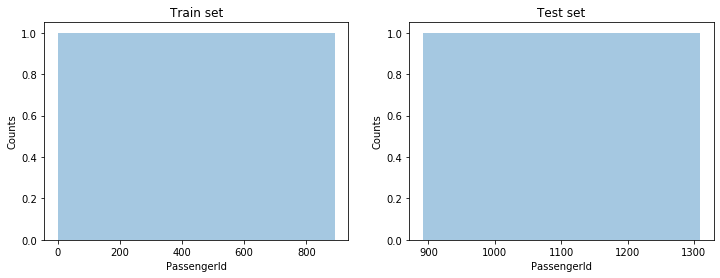

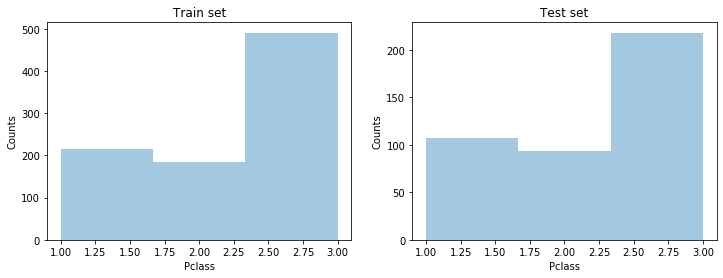

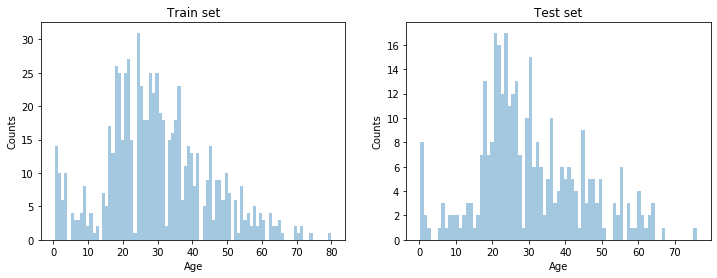

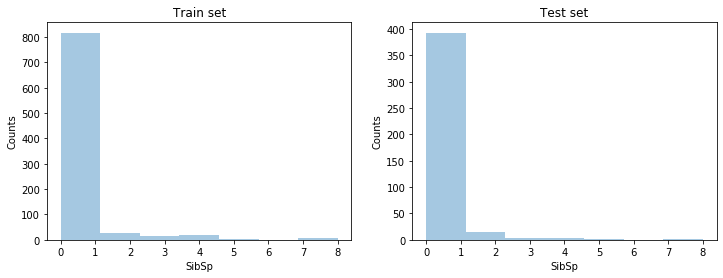

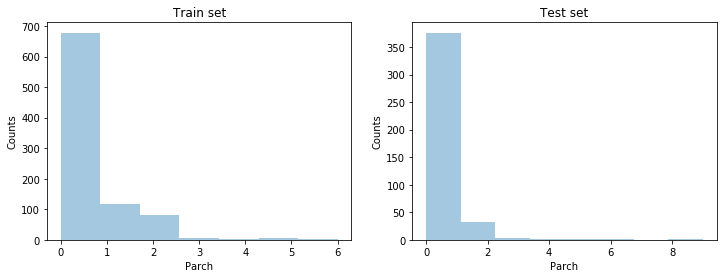

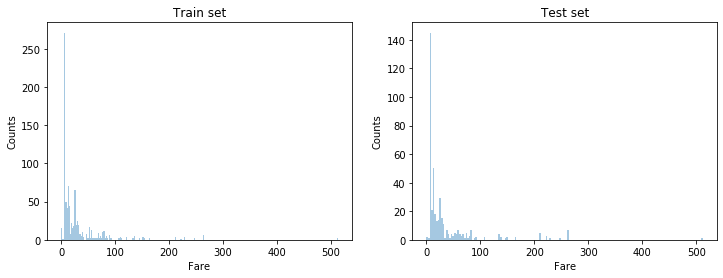

In [12]:
# Compare distributions of train and test set
# There seems to be no diffenrence in distributions
for col in numerical:
    plt.figure(figsize=(12,4))
    
    # Plot train set histograms
    plt.subplot(121)
    sns.distplot(X_train[col].values, bins=X_train[col].nunique(), kde=False)
    plt.title('Train set')
    plt.xlabel(col)
    plt.ylabel('Counts')

    # Plot test set histograms
    plt.subplot(122)
    sns.distplot(X_test[col].values, bins=X_test[col].nunique(), kde=False)
    plt.title('Test set')
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.show()

In [13]:
# It seems like there is a high density of fares between 7.05 and 8.05 $
train_fare_counts = pd.DataFrame(X_train['Fare'].value_counts()).rename(columns={'Fare': 'Fare Train'})
test_fare_counts = pd.DataFrame(X_test['Fare'].value_counts()).rename(columns={'Fare': 'Fare Test'})
fare_counts_all = pd.concat((train_fare_counts, test_fare_counts), axis=1)
fare_counts_all.sort_values(by='Fare Train', axis=0, ascending=False).head(50)

,Fare Train,Fare Test
8.0500,43.0,17.0
13.0000,42.0,17.0
7.8958,38.0,11.0
7.7500,34.0,21.0
26.0000,31.0,19.0
10.5000,24.0,11.0
7.9250,18.0,5.0
7.7750,16.0,10.0
7.2292,15.0,9.0
26.5500,15.0,7.0


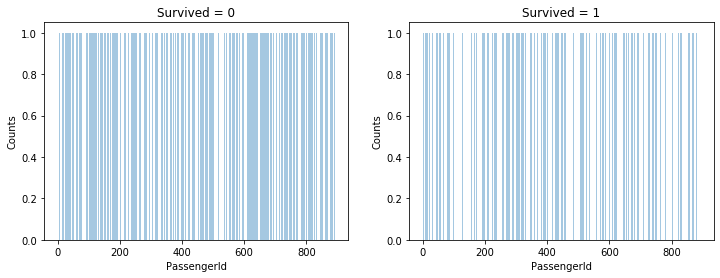

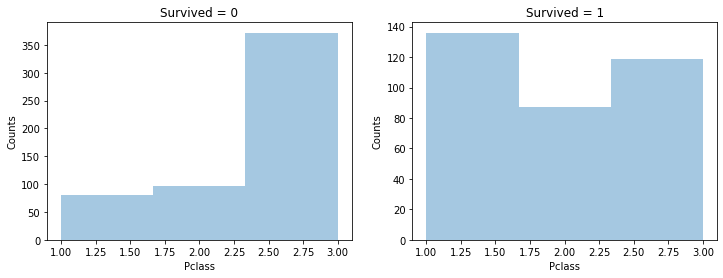

/home/charles/anaconda3/envs/kaggle/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/charles/anaconda3/envs/kaggle/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


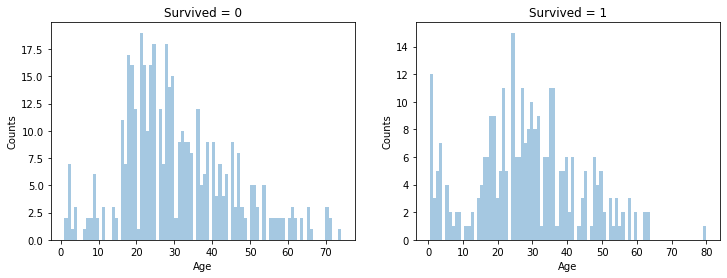

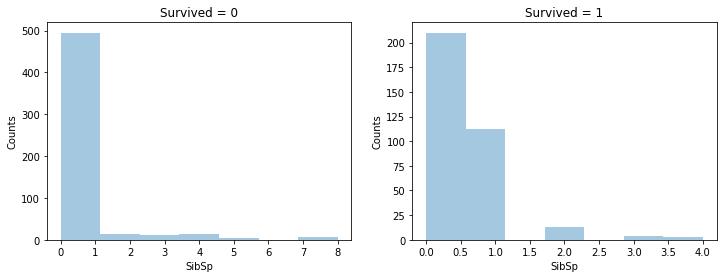

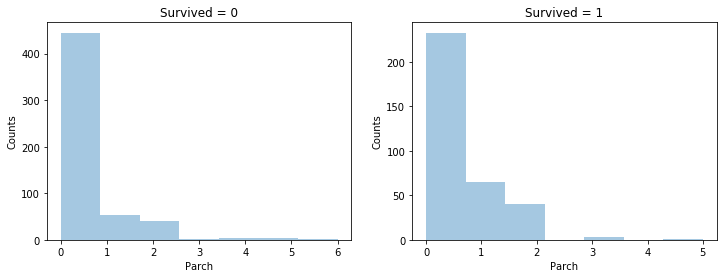

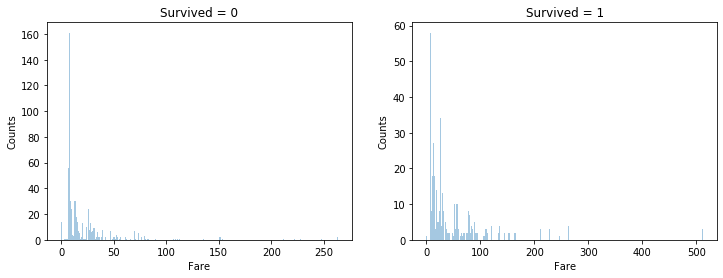

In [14]:
# Compare distributions of Survived = 0 and Survived = 1 in train set
for col in numerical:
    plt.figure(figsize=(12,4))
    
    # Plot histograms of deceased people
    plt.subplot(121)
    sns.distplot(X_train[col][y_train == 0].values, bins=X_train[col].nunique(), kde=False)
    plt.title('Survived = 0')
    plt.xlabel(col)
    plt.ylabel('Counts')

    # Plot histograms of people who survived
    plt.subplot(122)
    sns.distplot(X_train[col][y_train == 1].values, bins=X_train[col].nunique(), kde=False)
    plt.title('Survived = 1')
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.show()

Old people are less likely to survive.\
Young children are more lilely to survive.\
Families are more likely to survive.\
People with high fares are more likely to survive.

PassengerId has no clear associations with survival rate. However, IDs in train set are between 0 and 891, while IDs in test set are between 892 and 1309. This may indicate that PassengerIds were not sampled randomly. Maybe we can use this to identify people from the same passenger group.

In [87]:
# Compare distributions of train and test set (categorical variables)
for col in categorical:
    print(col)

Pclass
Name
Sex
Ticket
Cabin
Embarked


Ideas of features to generate:
Number of people with same ticket who survived
Number of people with same ticket who died
